In [45]:
#import important libraries 

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from scipy import signal
import matplotlib.image as mpimg
from pylab import figure
import cv2
import sklearn.metrics
from sklearn.metrics import mean_squared_error
import skimage
from skimage import data
%matplotlib inline

(<Figure size 432x288 with 1 Axes>,
 Text(0.5,1,'Cameraman'))

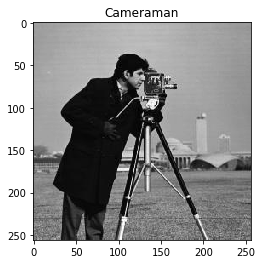

In [46]:
#we load the image in program using imread and we find the size of the image by getting number of rows and columns

inputimage=mpimg.imread('cameraman.jpg')
(row,col)= inputimage.shape
figure (1), plt.imshow(inputimage, cmap="gray"), plt.title('Cameraman')

In [47]:
#to generate the matrix of impulse response which 1/9 at every position on 3x3 matrix
# 1/9= 0.111
h= np.array([[0.111, 0.111, 0.111], [0.111, 0.111, 0.111],[0.111, 0.111, 0.111]])
print(h)

[[0.111 0.111 0.111]
 [0.111 0.111 0.111]
 [0.111 0.111 0.111]]


(<Figure size 432x288 with 1 Axes>,
 Text(0.5,1,'Y1'))

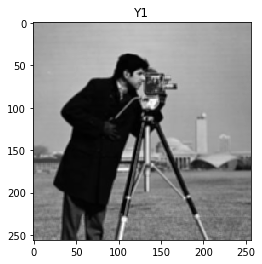

In [48]:
y1=signal.convolve2d(inputimage,h, boundary='symm', mode='same')  
figure (2), plt.imshow(y1, cmap="gray"), plt.title('Y1')         #Displaying the filtered image y1

(<Figure size 432x288 with 1 Axes>,
 Text(0.5,1,'Y2'))

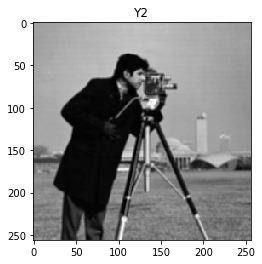

In [49]:
y2= ndimage.convolve(inputimage,h)
figure(3), plt.imshow(y2, cmap="gray"), plt.title("Y2")    #Display the filtered image y2

0.3557011534729021


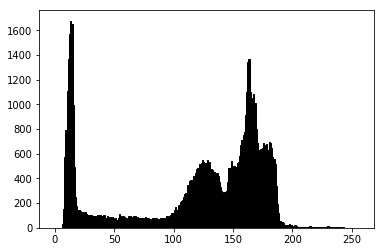

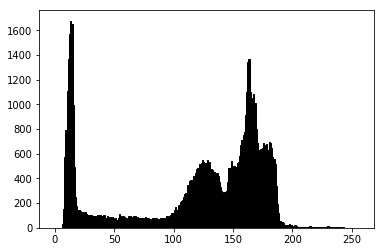

In [51]:
mp=mean_squared_error(y1,y2)                                     #comparing image y1 and y2
print mp # if the output value is less means the image y1 and y2 are more similar and if it is more then images are less similar
# mp= 0.35557011 
    
plt.hist(y1.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k')
plt.show()                                                        #PLOT histogram of Y1

plt.hist(y2.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k')
plt.show()                                                        #PLOT histogram of Y2

In [7]:
#if the matrix can be represented by multiplication of two vectors of row/column it is called seperable matrix
#Separable matrix can also be found out by finding rank of matrix and the impluse response h as rank 1

h1= h[0]   #row
print h[0]

[0.111 0.111 0.111]


In [8]:
h2= h[:,0]   #column
print h[:,0]

[0.111 0.111 0.111]


(<Figure size 432x288 with 1 Axes>,
 Text(0.5,1,'Y3'))

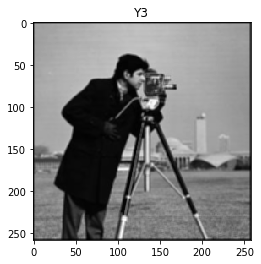

In [12]:
# here we perform 1D convolution, first we convolve with rows and then with columns
yconv1d=np.ones((256,258))            #size

for i in range (0, row):
    yconv1d[i,:]=signal.convolve(h1,inputimage[i,:])        #used row h1


yconv2d=np.ones((258,258))

for j in range (0, 258):
    yconv2d[:,j]=signal.convolve((yconv1d[:,j]),h2)         #used column h2

figure (4), plt.imshow(yconv2d, cmap="gray"), plt.title('Y3')    #output of the convolution


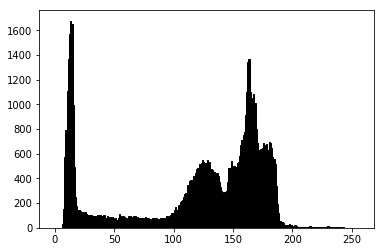

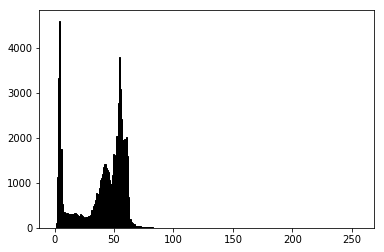

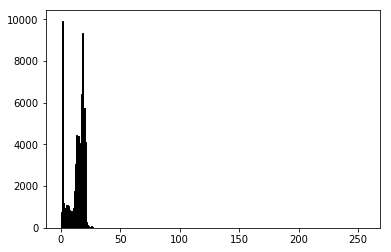

In [53]:

plt.hist(y1.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k')
plt.show()                                                               #PLOT histogram of y1
plt.hist(yconv1d.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k')
plt.show()                                                               #PLOT histogram of yconv1d
plt.hist(yconv2d.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k')
plt.show()                                                               #PLOT histogram of yconv2d

[[1, 0, 0], [0, 0, 0], [0, 0, 0]]
[[ 0.889 -0.111 -0.111]
 [-0.111 -0.111 -0.111]
 [-0.111 -0.111 -0.111]]


(<Figure size 432x288 with 1 Axes>,
 Text(0.5,1,' High pass filter '))

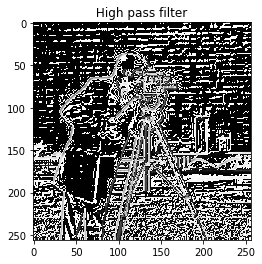

In [44]:
#our 3x3 2D filter response is a low pass filter because it smoothens the original image.
#after filtering the image gets blur so its because of low pass filter.
#So, we convert our low pass filter to high pass filter by subtracting it from the delta function

d=[[1,0,0],[0,0,0],[0,0,0]]            #delta function
h2=d-h                                 #h2 is the highpass filter
print d;

print h2;
highpassfilter= ndimage.convolve(inputimage,h2)
figure(5), plt.imshow(highpassfilter, cmap="gray"), plt.title(" High pass filter ")   #Filtered image using highpassfilter

In [54]:
#finding the mean of all the images 

A=np.mean(inputimage)
print A

B=np.mean(highpassfilter)
print B

C_scalingfactor=A/B      #finding the scaling factor
print C_scalingfactor

h2_new= h2*C_scalingfactor   #multiplying the scaling factor with h2 so that the image mean is unchanged
print h2_new

D=np.mean(h2)
print D
# MEAN of h2= 0.00011

E=np.mean(h2_new)
print E
#MEAN of h2_new= 0.00015 
    
# mean of h2 and h2_new is the same almost 
#so the scaling factor is correct

118.72265625
83.04905700683594
1.429548516610221
[[ 1.27086863 -0.15867989 -0.15867989]
 [-0.15867989 -0.15867989 -0.15867989]
 [-0.15867989 -0.15867989 -0.15867989]]
0.00011111111111111583
0.0001588387240677971


(<Figure size 432x288 with 1 Axes>,
 Text(0.5,1,'Y4(High Pass filter)'))

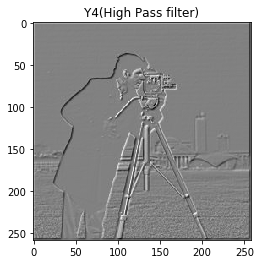

In [43]:
y4 = signal.convolve2d(h2,inputimage)
figure (5),plt.imshow(y4, cmap="gray"), plt.title('Y4(High Pass filter)')    #Filtered output IMAGE Y4